### name: The English name of the Pokemon
### type1: The Primary Type of the Pokemon
### type2: The Secondary Type of the Pokemon
### hp: The Base HP of the Pokemon
### attack: The Base Attack of the Pokemon
### defense: The Base Defense of the Pokemon
### sp_attack: The Base Special Attack of the Pokemon
### sp_defense: The Base Special Defense of the Pokemon
### speed: The Base Speed of the Pokemon
### generation: The numbered generation which the Pokemon was first introduced
### is_legendary: Denotes if the Pokemon is legendary.
### https://pokemon.fandom.com/wiki/Statistics#HP


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
pokemon_data=pd.read_csv('pokemon.csv')
pokemon_data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
pokemon_data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [8]:
pokemon_data.shape

(799, 12)

In [6]:
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [25]:
numerical_features=[feature for feature in pokemon_data.columns if pokemon_data[feature].dtypes!='O']

In [42]:
pokemon_data[numerical_features].describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,400.922403,401.384030,400.705195,400.525032,400.136774,398.842038,68.244055,3.326658
std,230.919897,230.069398,227.679457,227.937649,227.087066,228.848908,29.063266,1.660292
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000
25%,201.500000,203.500000,206.500000,204.500000,208.500000,201.500000,45.000000,2.000000
50%,401.000000,401.384030,400.705195,400.525032,400.136774,398.842038,65.000000,3.000000
75%,600.500000,599.500000,595.500000,595.500000,594.500000,595.500000,90.000000,5.000000
max,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,180.000000,6.000000


In [26]:
categorical_feature=[feature for feature in pokemon_data.columns if pokemon_data[feature].dtypes=='O']
categorical_feature

['Name', 'Type 1', 'Type 2']

In [36]:
pokemon_data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     26
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [24]:
pokemon_data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [25]:
pokemon_data['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ghost       14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

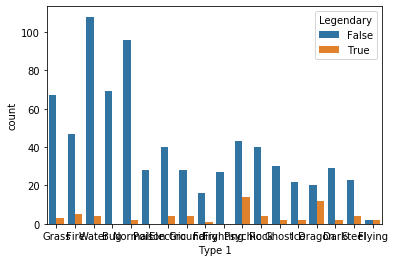

In [28]:
sns.countplot(data=pokemon_data,x='Type 1',hue='Legendary')

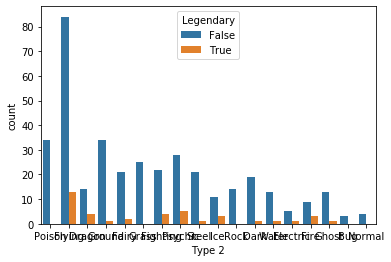

In [29]:
sns.countplot(data=pokemon_data,x='Type 2',hue='Legendary')

(array([ 10., 202., 336., 186.,  50.,  10.,   3.,   1.,   0.,   2.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

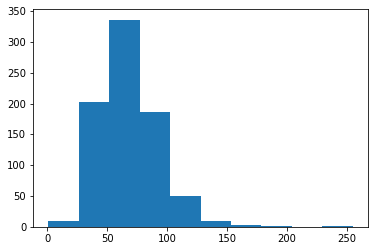

In [42]:
plt.hist(data=pokemon_data,x='HP')

(array([ 16.,  71., 173., 161., 166., 101.,  65.,  29.,  13.,   5.]),
 array([  5. ,  23.5,  42. ,  60.5,  79. ,  97.5, 116. , 134.5, 153. ,
        171.5, 190. ]),
 <a list of 10 Patch objects>)

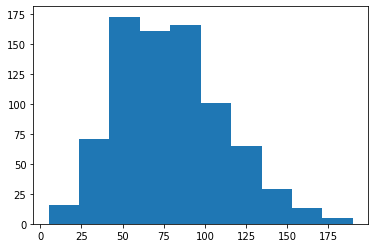

In [43]:
plt.hist(data=pokemon_data,x='Attack')

(array([ 31., 162., 218., 121., 123.,  75.,  38.,  19.,   9.,   4.]),
 array([ 10. ,  28.4,  46.8,  65.2,  83.6, 102. , 120.4, 138.8, 157.2,
        175.6, 194. ]),
 <a list of 10 Patch objects>)

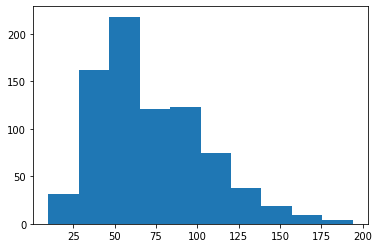

In [45]:
plt.hist(data=pokemon_data,x='Sp. Atk')

(array([ 97., 230., 223., 148.,  67.,  21.,  12.,   0.,   1.,   1.]),
 array([ 20.,  41.,  62.,  83., 104., 125., 146., 167., 188., 209., 230.]),
 <a list of 10 Patch objects>)

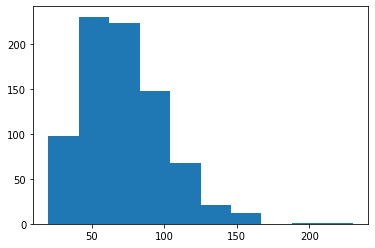

In [46]:
plt.hist(data=pokemon_data,x='Sp. Def')

(array([ 30.,  97., 183., 168., 144., 108.,  50.,  11.,   8.,   1.]),
 array([  5. ,  22.5,  40. ,  57.5,  75. ,  92.5, 110. , 127.5, 145. ,
        162.5, 180. ]),
 <a list of 10 Patch objects>)

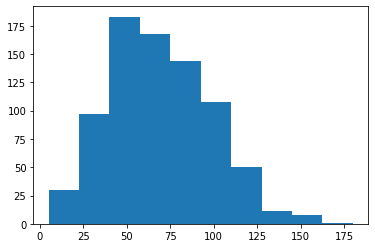

In [47]:
plt.hist(data=pokemon_data,x='Speed')

(array([166.,   0., 106.,   0., 160.,   0., 121.,   0., 165.,  82.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

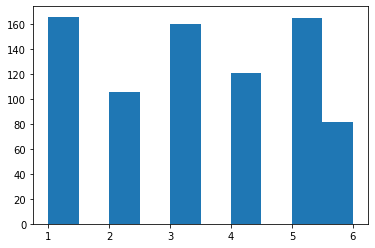

In [48]:
plt.hist(data=pokemon_data,x='Generation')

In [11]:
pokemon_data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [30]:
pokemon_data['Type 2']=pokemon_data['Type 2'].fillna('Unknown')

In [31]:
pokemon_data=pokemon_data[pokemon_data['Name'].notna()]

In [7]:
pokemon_data['Name'].notna().value_counts()

True    799
Name: Name, dtype: int64

In [5]:
pokemon_data.shape

(799, 12)

In [4]:
pokemon_data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

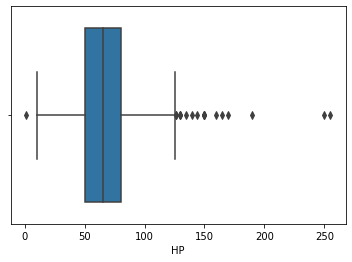

In [12]:
sns.boxplot(x='HP',data=pokemon_data)

In [5]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [6]:
outlier_pt=detect_outliers(pokemon_data['HP'])
print(outlier_pt)

[250, 160, 190, 255, 150, 170, 150, 150, 150, 165]


In [7]:
pokemon_data['HP']=pokemon_data['HP'].sort_values()

In [8]:
pokemon_data['HP']=pokemon_data[pokemon_data['HP']<min(outlier_pt)]

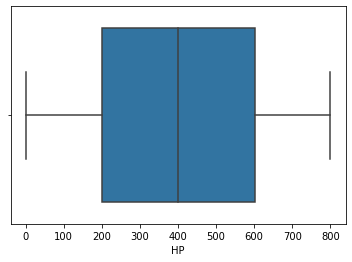

In [9]:
sns.boxplot(x='HP',data=pokemon_data)

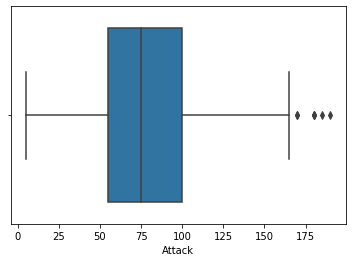

In [10]:
sns.boxplot(x='Attack',data=pokemon_data)

In [11]:
outlier_pt=detect_outliers(pokemon_data['Attack'])
min(outlier_pt)

150

In [12]:
pokemon_data['Attack']=pokemon_data['Attack'].sort_values()
pokemon_data['Attack']=pokemon_data[pokemon_data['Attack']<150]

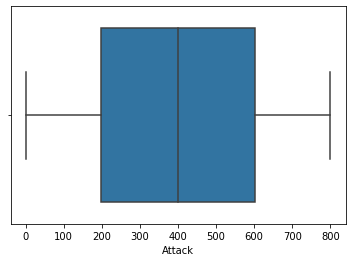

In [13]:
sns.boxplot(x='Attack',data=pokemon_data)

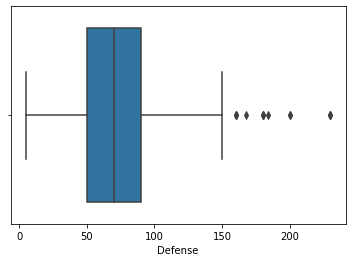

In [14]:
sns.boxplot(x='Defense',data=pokemon_data)

In [15]:
outlier_pt=detect_outliers(pokemon_data['Defense'])
min(outlier_pt)

150

In [37]:
pokemon_data['Defense']=pokemon_data['Defense'].sort_values()
pokemon_data['Defense']=pokemon_data[pokemon_data['Defense']<150]

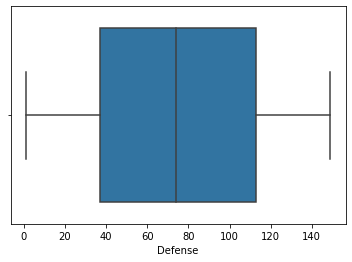

In [38]:
sns.boxplot(x='Defense',data=pokemon_data)

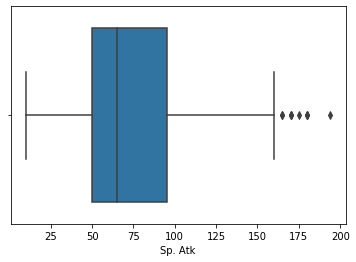

In [18]:
sns.boxplot(x='Sp. Atk',data=pokemon_data)

In [19]:
outlier_pt=detect_outliers(pokemon_data['Sp. Atk'])
min(outlier_pt)

150

In [21]:
pokemon_data['Sp. Atk']=pokemon_data['Sp. Atk'].sort_values()
pokemon_data['Sp. Atk']=pokemon_data[pokemon_data['Sp. Atk']<150]

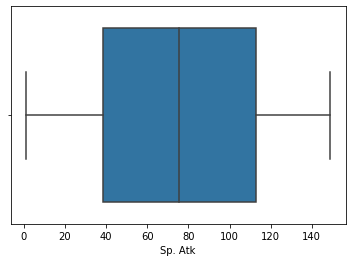

In [22]:
sns.boxplot(x='Sp. Atk',data=pokemon_data)

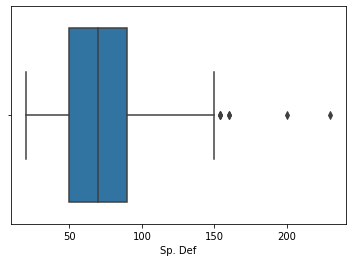

In [23]:
sns.boxplot(x='Sp. Def',data=pokemon_data)

In [24]:
outlier_pt=detect_outliers(pokemon_data['Sp. Def'])
min(outlier_pt)

150

In [25]:
pokemon_data['Sp. Def']=pokemon_data['Sp. Def'].sort_values()
pokemon_data['Sp. Def']=pokemon_data[pokemon_data['Sp. Def']<150]

In [26]:
pokemon_data['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [27]:
pokemon_data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP             10
Attack         29
Defense        20
Sp. Atk       654
Sp. Def        14
Speed           0
Generation      0
Legendary       0
dtype: int64

In [28]:

pokemon_data=pokemon_data.fillna(pokemon_data.mean())

In [32]:
pokemon_data.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaling=StandardScaler()

In [27]:
scaling.fit(pokemon_data[numerical_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
pokemon_data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,1.0,1.000000,1.000000,1.000000,1.000000,45,1,False
1,2,Ivysaur,Grass,Poison,2.0,2.000000,2.000000,2.000000,2.000000,60,1,False
2,3,Venusaur,Grass,Poison,3.0,3.000000,3.000000,3.000000,3.000000,80,1,False
3,4,Mega Venusaur,Grass,Poison,4.0,4.000000,4.000000,4.000000,4.000000,80,1,False
4,5,Charmander,Fire,Unknown,5.0,5.000000,5.000000,5.000000,5.000000,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,796.0,796.000000,400.525032,796.000000,398.842038,50,6,True
796,797,Mega Diancie,Rock,Fairy,797.0,400.705195,797.000000,400.136774,797.000000,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,798.0,798.000000,798.000000,400.136774,798.000000,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,799.0,400.705195,799.000000,400.136774,799.000000,80,6,True


In [29]:
pokemon_data.drop('#',axis=1,inplace=True)

In [29]:
pokemon_data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,1.0,1.0,1.0,1.0,1.0,45,1,False
1,Ivysaur,Grass,Poison,2.0,2.0,2.0,2.0,2.0,60,1,False
2,Venusaur,Grass,Poison,3.0,3.0,3.0,3.0,3.0,80,1,False
3,Mega Venusaur,Grass,Poison,4.0,4.0,4.0,4.0,4.0,80,1,False
4,Charmander,Fire,Unknown,5.0,5.0,5.0,5.0,5.0,65,1,False


In [33]:
pokemon_data['Type 1'].value_counts()


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Steel        27
Fighting     26
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label=LabelEncoder()

In [35]:
type1_labels=label.fit_transform(pokemon_data['Type 1'])
type1_mapping={index:label for index, label in enumerate(label.classes_)}

In [42]:
type1_labels

array([ 9,  9,  9,  9,  6,  6,  6,  6,  6, 17, 17, 17, 17,  0,  0,  0,  0,
        0,  0,  0, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10,
       13, 13, 13, 13, 13, 13,  4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,
        0,  0,  0,  0, 10, 10, 12, 12, 17, 17,  5,  6,  6, 17, 17, 17, 14,
       14, 14, 14,  5,  5,  5,  9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17,
       17, 17,  3,  3, 12, 12, 12, 17, 17, 13, 13, 17, 17,  8,  8,  8,  8,
       15, 14, 14, 17, 17,  3,  3,  9,  9, 10, 10,  5,  5, 12, 13, 13, 10,
       10, 12,  9, 12, 12, 17, 17, 17, 17, 17, 17, 14,  0, 11,  3,  6,  0,
        0, 12, 17, 17, 17, 17, 12, 12, 17,  3,  6, 12, 15, 15, 15, 15, 15,
       15, 12, 11,  3,  6,  2,  2,  2, 14, 14, 14, 14,  9,  9,  9,  6,  6,
        6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17, 17,  3,  4,
       12,  4,  4, 14, 14,  3,  3,  3,  3,  9, 17, 17, 15, 17,  9,  9,  9,
       12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,  0, 12,
       10, 16, 16,  4,  4

In [40]:
pokemon_data['Type 1']=type1_labels

In [41]:
pokemon_data

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,9,Poison,1.0,1.000000,1.000000,1.000000,1.000000,45,1,False
1,Ivysaur,9,Poison,2.0,2.000000,2.000000,2.000000,2.000000,60,1,False
2,Venusaur,9,Poison,3.0,3.000000,3.000000,3.000000,3.000000,80,1,False
3,Mega Venusaur,9,Poison,4.0,4.000000,4.000000,4.000000,4.000000,80,1,False
4,Charmander,6,Unknown,5.0,5.000000,5.000000,5.000000,5.000000,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,15,Fairy,796.0,796.000000,400.525032,796.000000,398.842038,50,6,True
796,Mega Diancie,15,Fairy,797.0,400.705195,797.000000,400.136774,797.000000,110,6,True
797,Hoopa Confined,14,Ghost,798.0,798.000000,798.000000,400.136774,798.000000,70,6,True
798,Hoopa Unbound,14,Dark,799.0,400.705195,799.000000,400.136774,799.000000,80,6,True


In [44]:
type2_labels=label.fit_transform(pokemon_data['Type 2'])

In [45]:
pokemon_data['Type 2']=type2_labels

In [46]:
pokemon_data.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,9,13,1.0,1.0,1.0,1.0,1.0,45,1,False
1,Ivysaur,9,13,2.0,2.0,2.0,2.0,2.0,60,1,False
2,Venusaur,9,13,3.0,3.0,3.0,3.0,3.0,80,1,False
3,Mega Venusaur,9,13,4.0,4.0,4.0,4.0,4.0,80,1,False
4,Charmander,6,17,5.0,5.0,5.0,5.0,5.0,65,1,False


In [48]:
pokemon_data.drop('Name',axis=1,inplace=True)

In [49]:
pokemon_data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,1.0,1.0,1.0,1.0,1.0,45,1,False
1,9,13,2.0,2.0,2.0,2.0,2.0,60,1,False
2,9,13,3.0,3.0,3.0,3.0,3.0,80,1,False
3,9,13,4.0,4.0,4.0,4.0,4.0,80,1,False
4,6,17,5.0,5.0,5.0,5.0,5.0,65,1,False


In [51]:
legendary_labels=label.fit_transform(pokemon_data['Legendary'])
legendary_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
pokemon_data['Legendary']=legendary_labels

In [53]:
pokemon_data.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,1.0,1.0,1.0,1.0,1.0,45,1,0
1,9,13,2.0,2.0,2.0,2.0,2.0,60,1,0
2,9,13,3.0,3.0,3.0,3.0,3.0,80,1,0
3,9,13,4.0,4.0,4.0,4.0,4.0,80,1,0
4,6,17,5.0,5.0,5.0,5.0,5.0,65,1,0


In [54]:
pokemon_data.to_csv(r'C:\Users\admin\pokemon_data.csv',index=False)

In [55]:
df=pd.read_csv('pokemon_data.csv')

In [56]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,1.0,1.0,1.0,1.0,1.0,45,1,0
1,9,13,2.0,2.0,2.0,2.0,2.0,60,1,0
2,9,13,3.0,3.0,3.0,3.0,3.0,80,1,0
3,9,13,4.0,4.0,4.0,4.0,4.0,80,1,0
4,6,17,5.0,5.0,5.0,5.0,5.0,65,1,0


In [57]:
from sklearn.model_selection import train_test_split

In [59]:
x=df[['Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']]
y=df[['Legendary']]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
y_train

,Legendary
408,0
513,0
306,0
109,0
263,1
...,...
763,0
192,0
629,0
559,0


In [62]:
x_train.shape

(559, 9)

In [63]:
y_train.shape

(559, 1)

In [64]:
x_test.shape

(240, 9)

In [65]:
y_test.shape

(240, 1)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_model=LogisticRegression()

In [68]:
log_model.fit(x_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred=log_model.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,pred)
accuracy

array([[217,   2],
       [ 17,   4]], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
accuracy

0.9208333333333333

In [74]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [75]:
predictedknn=neigh.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictedknn)
accuracy

0.9458333333333333